In [1]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

In [7]:
df = pd.read_csv("SVM_data.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   samples               101 non-null    object 
 1   accuracy              101 non-null    float64
 2   authentic_mislabeled  101 non-null    object 
 3   synthetic_mislabeled  101 non-null    object 
 4   top_10_features       101 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.1+ KB


In [23]:
df.head()

,samples,accuracy,authentic_mislabeled,synthetic_mislabeled,top_10_features
0,"['ALCOTT_synthetic_combined_122.txt', 'ALCOTT_...",0.8700,"['Stoker_1585.txt', 'Dickens_3308.txt', 'Alcot...","['TWAIN_synthetic_combined_17.txt', 'AUSTEN_sy...","{'the': 10.082099153229182, 'of': 8.6393794560..."
1,"['ALCOTT_synthetic_combined_89.txt', 'ALCOTT_s...",0.9125,"['Hopkins_81.txt', 'Hopkins_175.txt', 'Chesnut...","['TWAIN_synthetic_combined_22.txt', 'TWAIN_syn...","{'the': 10.575662838274173, 'of': 9.4734034069..."
2,"['ALCOTT_synthetic_combined_72.txt', 'ALCOTT_s...",0.8750,"['Alcott_712.txt', 'Dickens_2952.txt', 'Austen...","['AUSTEN_synthetic_combined_13.txt', 'TWAIN_sy...","{'the': 9.779076137171133, 'of': 8.65946958933..."
3,"['ALCOTT_synthetic_combined_99.txt', 'ALCOTT_s...",0.9275,"['Twain_1363.txt', 'Dickens_1219.txt', 'Griggs...","['TWAIN_synthetic_combined_165.txt', 'AUSTEN_s...","{'the': 10.601373469045889, 'of': 9.7870627831..."
4,"['ALCOTT_synthetic_combined_4.txt', 'ALCOTT_sy...",0.8975,"['Alcott_2687.txt', 'Stoker_188.txt', 'Gaskell...","['TWAIN_synthetic_combined_165.txt', 'AUSTEN_s...","{'the': 9.619232419189826, 'of': 8.87767333326..."


In [24]:
df_sorted = df.sort_values("accuracy", ascending=False).reset_index()
df_sorted.head()

,index,samples,accuracy,authentic_mislabeled,synthetic_mislabeled,top_10_features
0,13,"['ALCOTT_synthetic_combined_124.txt', 'ALCOTT_...",0.9475,"['Austen_375.txt', 'Twain_1711.txt', 'Griggs_2...","['TWAIN_synthetic_combined_183.txt', 'TWAIN_sy...","{'the': 10.484387088720025, 'of': 9.7124103410..."
1,86,"['ALCOTT_synthetic_combined_149.txt', 'ALCOTT_...",0.9375,"['Chesnutt_461.txt', 'Alcott_907.txt', 'Griggs...","['TWAIN_synthetic_combined_83.txt', 'TWAIN_syn...","{'the': 9.952932375702325, 'of': 9.11383545827..."
2,18,"['ALCOTT_synthetic_combined_152.txt', 'ALCOTT_...",0.9375,"['Twain_1537.txt', 'Dickens_7668.txt', 'Bronte...","['TWAIN_synthetic_combined_190.txt', 'TWAIN_sy...","{'the': 10.402296985945911, 'of': 8.7976989445..."
3,32,"['ALCOTT_synthetic_combined_113.txt', 'ALCOTT_...",0.9375,"['Hopkins_72.txt', 'Griggs_124.txt', 'Bronte_1...","['TWAIN_synthetic_combined_52.txt', 'AUSTEN_sy...","{'the': 11.073486708719978, 'of': 10.018576898..."
4,98,"['ALCOTT_synthetic_combined_169.txt', 'ALCOTT_...",0.9350,"['Gaskell_2186.txt', 'Austen_664.txt', 'Austen...","['TWAIN_synthetic_combined_16.txt', 'GRIGGS_sy...","{'the': 9.700242955539217, 'of': 9.38075875853..."


In [36]:
from statistics import mean 
accuracy_values = (df['accuracy']).tolist()
print("Mean accuracy for SVM: " + str(mean(accuracy_values)))
print("Max accuracy for SVM: " + str(max(accuracy_values)))


Mean accuracy for SVM: 0.9108415841584159
Max accuracy for SVM: 0.9475


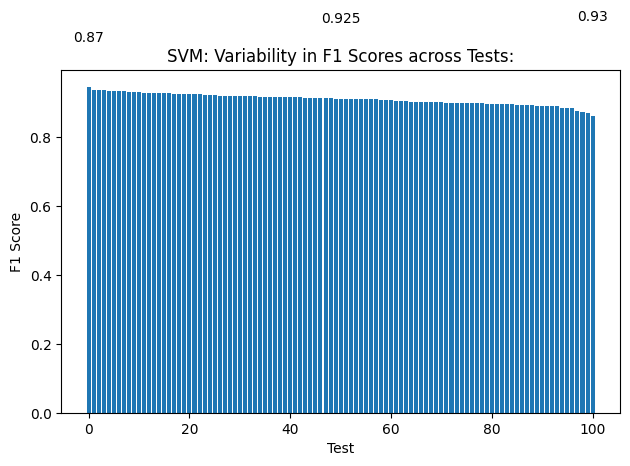

In [31]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(df_sorted.index.values, df_sorted['accuracy'])

# Step 2: Labeling the graph
plt.xlabel('Test')
plt.ylabel('F1 Score')
plt.title('SVM: Variability in F1 Scores across Tests:')



# Step 3: Show the plot
plt.tight_layout()
plt.show()

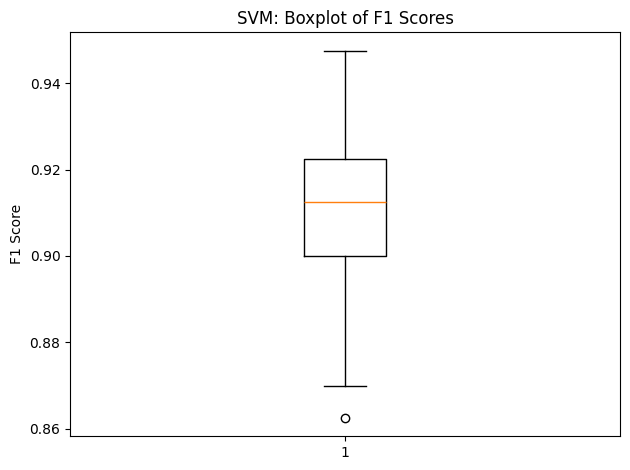

In [35]:
plt.figure()  # Optional: Adjust figure size if necessary
plt.boxplot(df['accuracy'])

# Step 2: Label the graph
plt.ylabel('F1 Score')
plt.title('SVM: Boxplot of F1 Scores')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

In [9]:
authentic = df['authentic_mislabeled'].tolist()

authentic_mislabeled = []

import ast

# Iterate over each string in the list
for item in authentic:
    # Convert the string representation of the list into an actual list using ast.literal_eval
    sublist = ast.literal_eval(item)
    # Extend the flat_list with elements from the sublist
    authentic_mislabeled.extend(sublist)

author_mislabeled = []

for x in authentic_mislabeled:
    name = x.split("_")[0]
    author_mislabeled.append(name.lower())



string_counts = Counter(author_mislabeled)

# Create a DataFrame from the Counter dictionary
auth_df = pd.DataFrame(list(string_counts.items()), columns=['author', 'Count'])
auth_df = auth_df.sort_values("Count", ascending=False)

In [10]:
print("Number of times an authentic chunk by an author was labelled synthetic out of 200,000 samples (2000 samples by 100 runs):")

auth_df.head(10)

Number of times an authentic chunk by an author was labelled synthetic out of 200,000 samples (2000 samples by 100 runs):


,author,Count
9,twain,398
2,alcott,387
4,chesnutt,340
6,bronte,336
1,dickens,333
5,griggs,326
3,gaskell,279
8,austen,272
7,hopkins,266
0,stoker,141


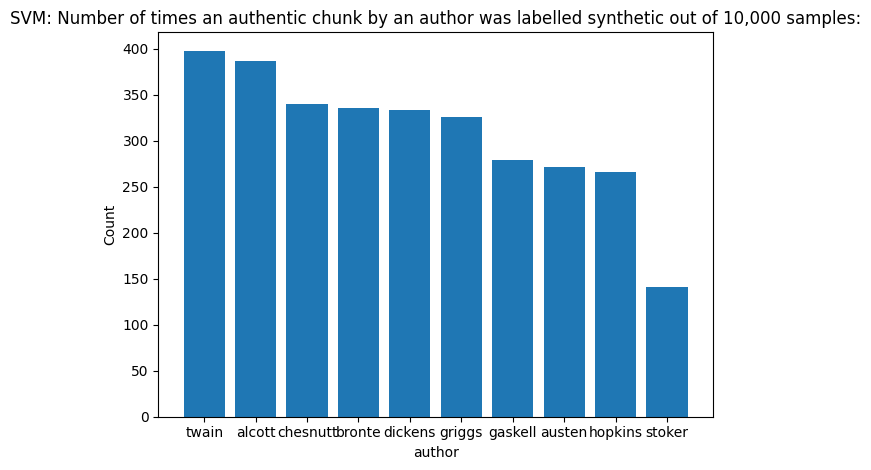

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(auth_df['author'], auth_df['Count'])

# Step 2: Labeling the graph
plt.xlabel('author')
plt.ylabel('Count')
plt.title('SVM: Number of times an authentic chunk by an author was labelled synthetic out of 10,000 samples:')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

plt.savefig('authentic_mislabeled.png', dpi=300)  # Save as PNG with 300 DPI

In [12]:
synthetic = df['synthetic_mislabeled'].tolist()

synthetic_mislabeled = []

import ast

# Iterate over each string in the list
for item in synthetic:
    # Convert the string representation of the list into an actual list using ast.literal_eval
    sublist = ast.literal_eval(item)
    # Extend the flat_list with elements from the sublist
    synthetic_mislabeled.extend(sublist)

author_mislabeled_syn = []

for x in synthetic_mislabeled:
    name = x.split("_")[0]
    author_mislabeled_syn.append(name.lower())

string_counts_syn = Counter(author_mislabeled_syn)

# Create a DataFrame from the Counter dictionary
auth_df_syn = pd.DataFrame(list(string_counts_syn.items()), columns=['author', 'Count'])
auth_df_syn = auth_df_syn.sort_values("Count", ascending=False)

In [13]:
print("Number of times an synthetic chunk by GPT mimicking an author was labelled authentic out of 200,000 samples (2000 samples by 100 runs):")

auth_df_syn.head(10)

Number of times an synthetic chunk by GPT mimicking an author was labelled authentic out of 200,000 samples (2000 samples by 100 runs):


,author,Count
0,twain,406
1,austen,71
2,alcott,25
3,griggs,14
4,dickens,8


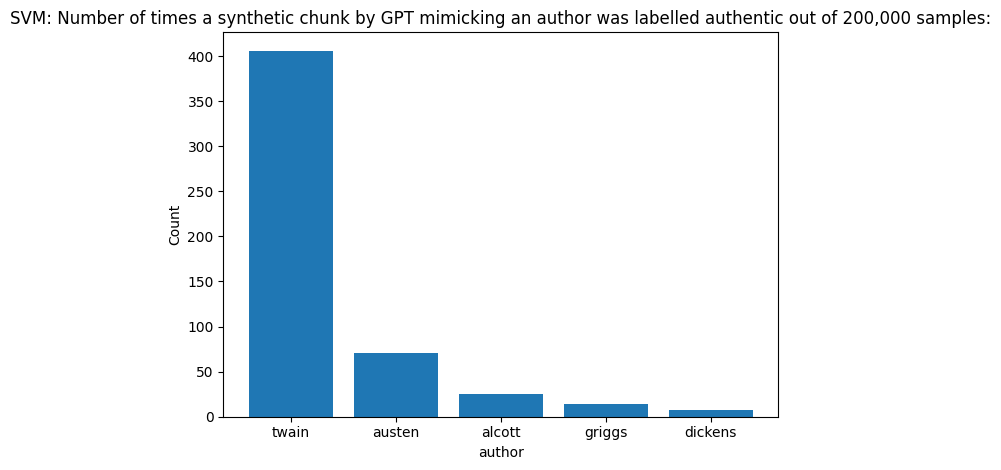

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(auth_df_syn['author'], auth_df_syn['Count'])

# Step 2: Labeling the graph
plt.xlabel('author')
plt.ylabel('Count')
plt.title('SVM: Number of times a synthetic chunk by GPT mimicking an author was labelled authentic out of 200,000 samples:')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

plt.savefig('synthetic_mislabeled.png', dpi=300)  # Save as PNG with 300 DPI

In [15]:
dict_list = []

# Loop through the column, and check if the row is a dictionary or a string
for index, row in df['top_10_features'].items():
    if isinstance(row, str):
        # Convert the string to a dictionary
        row_dict = ast.literal_eval(row)
    elif isinstance(row, dict):
        # If it's already a dictionary, use it directly
        row_dict = row
    else:
        # Skip if the row is neither a string nor a dictionary
        print(f"Row {index} is not a valid type, skipping.")
        continue
    
    # Append the dictionary to the list
    dict_list.append(row_dict)
    
all_keys = []

# Loop through each dictionary and extract the keys
for d in dict_list:
    all_keys.extend(d.keys())

# Use Counter to count the occurrences of each key
key_counts = Counter(all_keys)

# Convert the Counter dictionary to a DataFrame
feature_keys_df = pd.DataFrame(list(key_counts.items()), columns=['Key', 'Count'])

In [16]:
feature_keys_df.sort_values("Count", ascending=False)

,Key,Count
0,the,101
1,of,101
2,a,101
3,to,101
4,i,101
5,he,101
6,male_pronouns,101
10,was,99
7,her,72
9,had,64


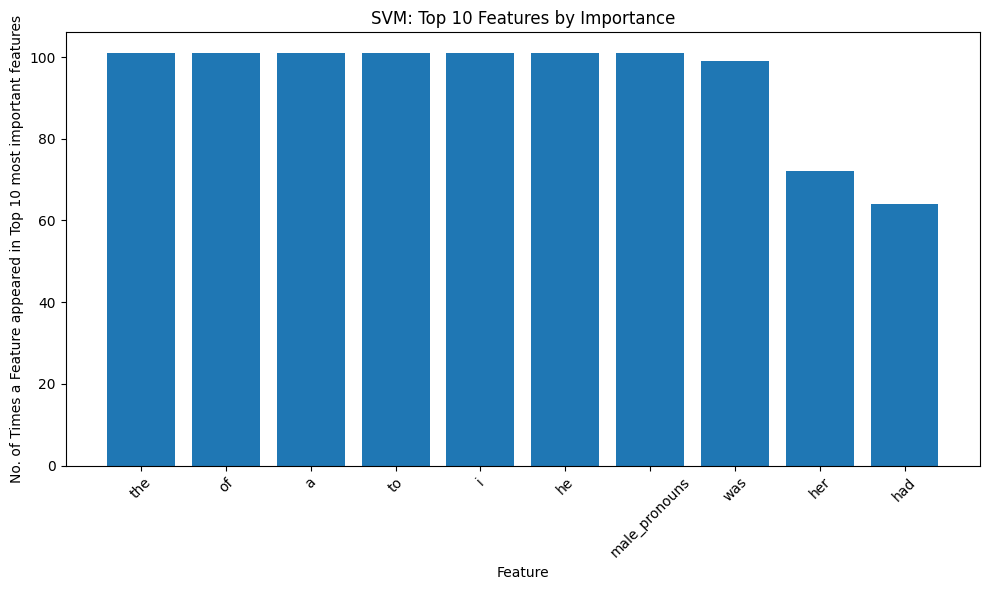

In [21]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you want the top 10 rows based on a 'Count' column
top_features_df = feature_keys_df.nlargest(10, 'Count')  # Adjust 'Count' to the column you want to sort by

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(top_features_df['Key'], top_features_df['Count'])  # Use appropriate column names

# Labeling the graph
plt.xlabel('Feature')
plt.ylabel('No. of Times a Feature appeared in Top 10 most important features')
plt.title('SVM: Top 10 Features by Importance')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the bar chart
plt.tight_layout()
plt.show()


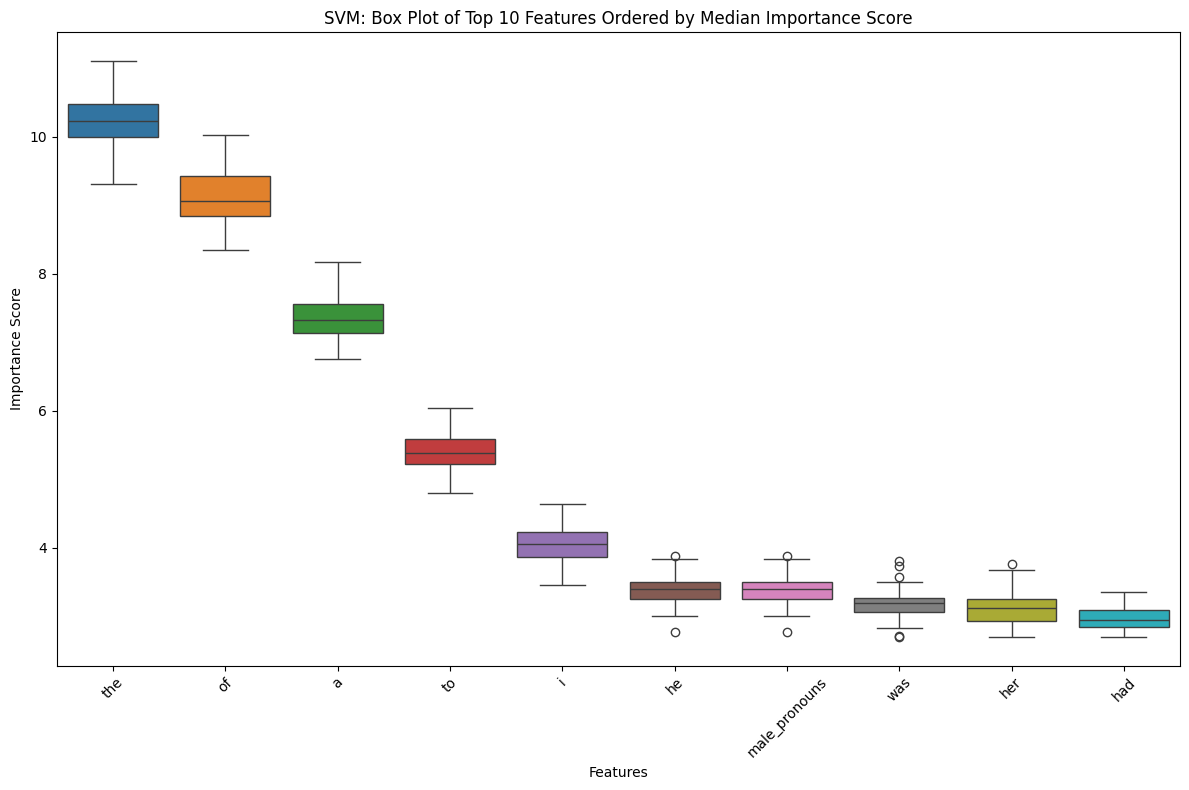

In [22]:
import seaborn as sns

# Step 2: Get the top 20 keys based on their occurrence
top_10_keys = [k for k, v in key_counts.most_common(10)]

# Step 3: Create a dictionary to store values associated with each key
key_values = {key: [] for key in top_10_keys}

# Step 4: Collect values for each key across all dictionaries
for d in dict_list:
    for key in top_10_keys:
        if key in d:
            key_values[key].append(d[key])

# Step 5: Convert key-values dictionary into a DataFrame for plotting
data = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in key_values.items()]))

medians = data.median().sort_values(ascending=False)
data = data[medians.index]  # Reorder DataFrame columns based on sorted medians

# Step 7: Create a box plot for the top 20 keys ordered by median
plt.figure(figsize=(12, 8))  # Adjust the figure size if necessary
sns.boxplot(data=data)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('SVM: Box Plot of Top 10 Features Ordered by Median Importance Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the box plot
plt.tight_layout()
plt.show()
